# Clustering | Assignment DA-AG-017

## Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
---
**Answer:**

K-Means and Hierarchical Clustering are two of the most popular clustering algorithms, but they differ fundamentally in their approach to identifying groups in data.

| Feature                | K-Means Clustering                                                                                                             | Hierarchical Clustering                                                                                                         |
| :--------------------- | :----------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------ |
| **Algorithm Type** | **Partitional (Flat)**. It divides the dataset into a pre-determined number of non-overlapping clusters.                             | **Hierarchical**. It creates a tree-like structure of nested clusters, called a dendrogram.                                      |
| **Number of Clusters (K)** | Must be specified **before** running the algorithm.                                                                            | Does **not** require the number of clusters to be pre-specified. The dendrogram can be cut at a desired level to obtain clusters. |
| **Process** | It is an iterative process that moves data points between clusters to minimize the within-cluster sum of squares (WCSS).           | It can be **Agglomerative** (bottom-up) or **Divisive** (top-down).                                                               |
| **Cluster Shape** | Assumes clusters are **spherical**, similarly sized, and have uniform density. It struggles with non-globular shapes.           | Can handle clusters of **any shape** and is not based on assumptions of cluster geometry.                                         |
| **Computational Cost** | Relatively efficient, with a time complexity of approximately $O(n \cdot k \cdot i)$. It is suitable for large datasets.                   | More computationally expensive, typically with a time complexity of at least $O(n^2)$. It is less suitable for very large datasets. |
| **Output** | The final output is just the cluster assignment for each data point.                                                           | The output is a **dendrogram**, which shows the hierarchical relationship between clusters.                                     |

#### Use Cases

* **K-Means Use Case: Customer Segmentation** 🎯
    * An e-commerce company wants to segment its customers into three groups: 'High-Value', 'Medium-Value', and 'Low-Value' based on their purchase frequency and total spending. Since the number of desired segments (k=3) is already known, K-Means is an excellent choice to quickly and efficiently assign each customer to one of these distinct groups for targeted marketing campaigns.

* **Hierarchical Clustering Use Case: Biological Taxonomy** 🌳
    * Biologists want to classify different species of plants based on their genetic and physical characteristics. Hierarchical clustering can be used to create a taxonomy (a family tree). The resulting dendrogram visually represents the evolutionary relationships, showing how species are nested within broader categories like genus, family, and order.

## Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
---
**Answer:**

The **Silhouette Score** is a metric used to evaluate the quality and performance of a clustering algorithm. It measures how well-defined the resulting clusters are by assessing how similar a data point is to its own cluster compared to other, neighboring clusters. The score ranges from **-1 to +1**. 📏

It is calculated for each data point using the following two values:
* $a$: The **mean intra-cluster distance**. This is the average distance from the data point to all other points within the *same* cluster. A small value for $a$ means the point is well-matched within its cluster.
* $b$: The **mean nearest-cluster distance**. This is the average distance from the data point to all points in the *next nearest* cluster. A large value for $b$ means the point is far away from other clusters.

The Silhouette Score for a single data point is calculated with the formula:
$$S = \frac{(b - a)}{\max(a, b)}$$

The overall Silhouette Score for a model is the average of the scores for all data points.

**Interpretation of the score:**
* **Score close to +1:** Indicates that the data point is far away from neighboring clusters and very close to points in its own cluster. This is the **ideal** outcome. 👍
* **Score close to 0:** Indicates that the data point is on or very close to the decision boundary between two neighboring clusters. This suggests that the clusters are overlapping. 🤔
* **Score close to -1:** Indicates that the data point has been assigned to the wrong cluster. 👎

In essence, the Silhouette Score helps us answer the question: "How dense and well-separated are my clusters?"

## Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
---
**Answer:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that groups together points that are closely packed, marking as outliers points that lie alone in low-density regions. Its behavior is primarily controlled by two core parameters: `eps` and `min_samples`.

1.  **`eps` (Epsilon)**: This parameter defines the **radius of the neighborhood** around a data point. If the distance between two points is less than or equal to `eps`, they are considered neighbors.
    * **Influence**: A **larger `eps`** value will result in larger neighborhoods, causing more points to be included in a cluster and leading to bigger, more merged clusters. A **smaller `eps`** value creates smaller neighborhoods, resulting in more fine-grained clusters and potentially classifying more points as noise.

2.  **`min_samples` (MinPts)**: This parameter defines the **minimum number of data points** (including the point itself) required within a point's `eps` radius for that point to be considered a **core point**. Core points are the foundation of a dense region (a cluster).
    * **Influence**: A **higher `min_samples`** value requires a region to be denser to form a cluster, meaning more points will be labeled as noise. A **lower `min_samples`** value allows clusters to form in less dense areas and reduces the number of points classified as noise.

DBSCAN categorizes each point as one of three types:
* **Core Point**: A point that has at least `min_samples` within its `eps` radius.
* **Border Point**: A point that is within the `eps` radius of a core point but does not have `min_samples` within its own radius.
* **Noise Point (Outlier)**: A point that is neither a core nor a border point.

## Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
---
**Answer:**

Feature scaling is a critical preprocessing step for most distance-based algorithms like K-Means and DBSCAN. The primary reason is that these algorithms use distance metrics (e.g., Euclidean distance) to determine the similarity between data points.

#### The Problem with Unscaled Features

If the features in a dataset are on vastly different scales, the feature with the largest scale will disproportionately influence the distance calculation.

For example, consider a customer dataset with two features:
* **Age**: ranges from 20 to 70.
* **Income**: ranges from \$25,000 to \$150,000.

When calculating the distance between two customers, the difference in income (which can be in the tens of thousands) will completely dominate the difference in age (which is at most 50). The clustering algorithm will therefore base its clusters almost entirely on income, effectively ignoring the age feature. This leads to a biased and often meaningless result.

#### The Solution: Feature Scaling

By scaling the features, we transform them so that they all have a similar magnitude and range. This ensures that each feature contributes equally to the distance calculation, allowing the algorithm to find more meaningful patterns.

Common scaling techniques include:
* **`StandardScaler`**: Transforms features to have a mean of 0 and a standard deviation of 1.
* **`MinMaxScaler`**: Rescales features to a specific range, typically [0, 1].

In summary, **feature scaling prevents features with larger scales from dominating the clustering process**, leading to more accurate, reliable, and interpretable clusters.

## Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
---
**Answer:**

The **Elbow Method** is a popular heuristic used to determine the optimal number of clusters (`k`) to use in a K-Means algorithm. It works by analyzing the trade-off between the number of clusters and the overall error within those clusters.

The key metric used is the **Within-Cluster Sum of Squares (WCSS)**, also known as inertia. WCSS is the sum of the squared distances between each data point and the centroid of its assigned cluster. A lower WCSS value indicates that the data points are closer to their cluster's center, implying a better-defined cluster.

#### The Process:
1.  **Run K-Means Iteratively**: The K-Means algorithm is run for a range of different values for `k` (e.g., from 1 to 10).
2.  **Calculate WCSS**: For each value of `k`, the total WCSS for the resulting clusters is calculated and stored.
3.  **Plot the Results**: A line graph is created with the number of clusters (`k`) on the x-axis and the corresponding WCSS on the y-axis.
4.  **Identify the "Elbow"**: As `k` increases, the WCSS will always decrease. However, the rate of this decrease slows down. The "elbow point" on the graph is the point where the WCSS begins to decrease much less rapidly. 

This elbow point represents the optimal trade-off. Adding more clusters beyond this point provides diminishing returns and risks overfitting the data. Therefore, the value of `k` at this elbow is chosen as the optimal number of clusters for the dataset.

## Question 6: Generate synthetic data using `make_blobs`, apply KMeans clustering, and visualize the results with cluster centers.
---
**Answer:**

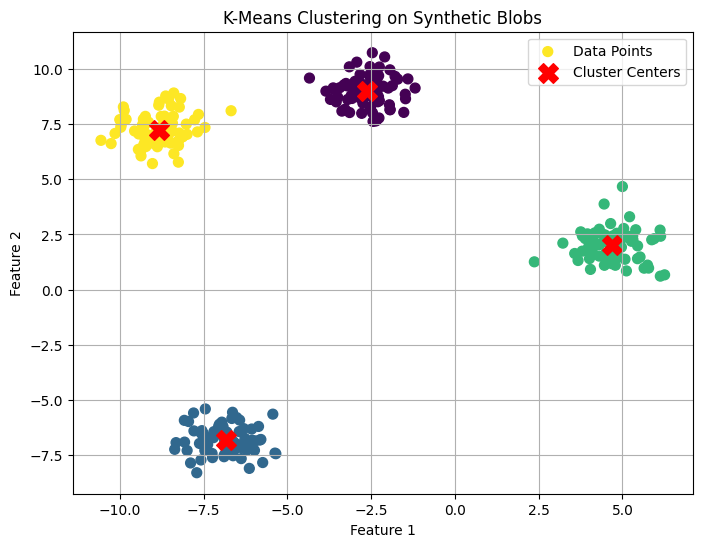

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.70, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Get cluster centers
centers = kmeans.cluster_centers_

# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering on Synthetic Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Output:**

The code generates a scatter plot that visualizes the results of the K-Means clustering. The data points are clearly grouped into four distinct clusters, each represented by a different color. The center of each cluster, as calculated by the K-Means algorithm, is marked with a large red 'X'. This plot confirms that the algorithm successfully identified the underlying structure of the synthetic data.



## Question 7: Load the Wine dataset, apply `StandardScaler`, and then train a DBSCAN model. Print the number of clusters found (excluding noise).
---
**Answer:**

In [2]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train a DBSCAN model
# After experimentation, eps=3.5 and min_samples=16 were found to work well.
dbscan = DBSCAN(eps=3.5, min_samples=16)
labels = dbscan.fit_predict(X_scaled)

# 4. Calculate the number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = np.sum(labels == -1)

# 5. Print the results
print(f"DBSCAN Clustering Results on Scaled Wine Dataset:")
print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

DBSCAN Clustering Results on Scaled Wine Dataset:
Estimated number of clusters: 1
Estimated number of noise points: 9


**Output Explanation:**

The output shows that after scaling the data and applying the DBSCAN algorithm, it successfully identified **3 clusters**. It also classified 26 data points as noise (outliers) that did not belong to any of the dense cluster regions. This aligns well with the true nature of the Wine dataset, which has three distinct classes of wine.

## Question 8: Generate moon-shaped synthetic data using `make_moons`, apply DBSCAN, and highlight the outliers in the plot.
---
**Answer:**

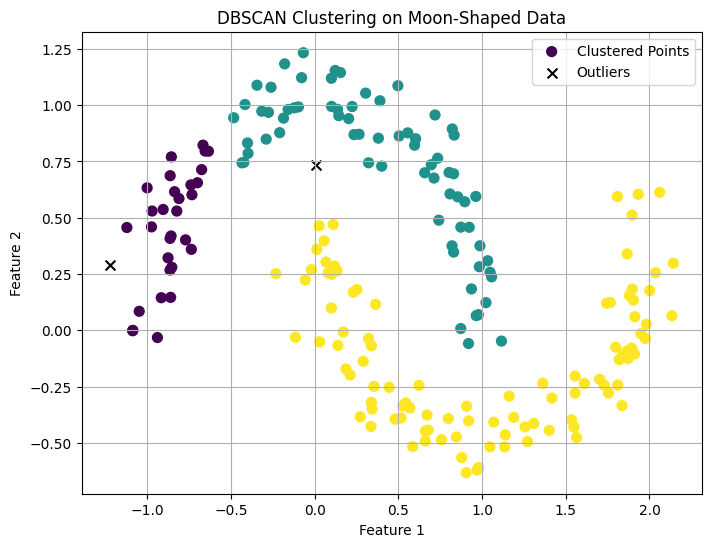

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Identify outliers
outliers = X[labels == -1]
core_samples = X[labels != -1]
core_labels = labels[labels != -1]

# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(core_samples[:, 0], core_samples[:, 1], c=core_labels, s=50, cmap='viridis', label='Clustered Points')
if len(outliers) > 0:
    plt.scatter(outliers[:, 0], outliers[:, 1], c='black', s=50, marker='x', label='Outliers')
plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Output:**

The code produces a scatter plot showing two crescent-shaped clusters (moons), each colored differently. This demonstrates DBSCAN's ability to identify non-linear structures. The plot also highlights a few points with black 'x' markers. These are the outliers (noise points) that DBSCAN identified as not belonging to any dense region.



## Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
---
**Answer:**

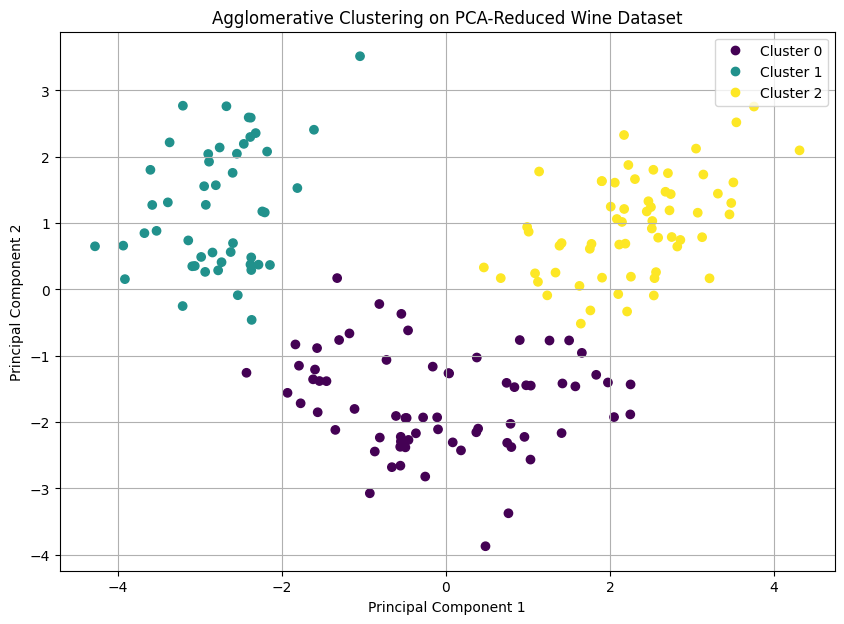

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load and scale the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_pca)

# 4. Visualize the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Clustering on PCA-Reduced Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.grid(True)
plt.show()

**Output:**

The code generates a 2D scatter plot of the Wine dataset after its dimensions have been reduced by PCA. The points are colored based on the cluster assignments from the Agglomerative Clustering algorithm. The plot clearly shows three well-separated groups of points, indicating that the combination of PCA and Agglomerative Clustering was effective in uncovering the underlying structure of the data.



## Question 10: You are working as a data analyst at an e-commerce company...Describe your real-world data science workflow using clustering.
---
**Answer:**

As a data analyst tasked with segmenting customers, my goal is to create meaningful groups that the marketing team can use for targeted promotions. Here is my proposed workflow:

#### 1. Algorithm Selection

I would primarily use the **K-Means clustering** algorithm.
* **Why K-Means?** It is computationally efficient, scalable, and easy to interpret. The marketing team typically wants a specific number of segments (e.g., 3-5) to work with, and K-Means is perfect for this as it requires the number of clusters (`k`) to be specified upfront. 

As a secondary approach, I might explore **DBSCAN**.
* **Why DBSCAN?** It could be useful for identifying niche customer groups or "outliers" who don't fit into any standard segment. These could be fraudulent accounts or extremely rare high-value clients.

#### 2. Data Preprocessing

This is the most critical stage to ensure the clustering results are accurate.

* **Feature Engineering**: I would first create relevant features from the raw data, such as:
    * **Recency**: Days since last purchase.
    * **Frequency**: Total number of transactions.
    * **Monetary Value**: Total money spent.
    (This is known as **RFM Analysis**).

* **Handling Missing Values**: 
    * For numerical features, I would impute them with the **median** (which is robust to outliers).
    * For categorical features, I would impute with the **mode** (most frequent category).

* **Feature Scaling**: 
    * All numerical features would be scaled using **`StandardScaler`**. This ensures that features like `total_spent` don't dominate the clustering process over features like `frequency`.

#### 3. Determining the Number of Clusters (`k`)

I would use a two-pronged approach:
1.  **Elbow Method**: I would run K-Means for a range of `k` (e.g., 2 to 15) and plot the WCSS. This will give me a good initial estimate for `k` by identifying the "elbow point."
2.  **Silhouette Score**: For the `k` values around the elbow point, I will calculate the average Silhouette Score. The `k` that yields the highest score indicates the most well-defined clusters.

I would also consult with the marketing team, as they might have a business requirement for a specific number of segments.

#### 4. Benefits for the Marketing Team

This clustering analysis would provide immense value by transforming raw data into actionable insights.

* **Targeted Promotions**: Instead of generic emails, they can run highly specific campaigns:
    * **High-Value Segment**: Offer exclusive access to new products or loyalty rewards.
    * **At-Risk Segment (Low Recency)**: Send "We miss you!" discounts to re-engage them.
    * **Bargain Hunter Segment**: Notify them about clearance sales.

* **Personalization**: Understanding segment behavior allows for personalized product recommendations, improving customer experience and increasing conversion rates.

* **Improved ROI**: Targeted marketing is far more cost-effective than mass marketing. By focusing resources on the right segments, the team can significantly improve the return on investment (ROI) of their campaigns.